# Exercise 10.1

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

## EDA

In [2]:
data_frame = pd.read_csv('data\Advertising.csv')

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
data_frame.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data_frame = data_frame[['radio', 'newspaper']]

In [6]:
data_frame.describe()

,radio,newspaper
count,200.000000,200.000000
mean,23.264000,30.554000
std,14.846809,21.778621
min,0.000000,0.300000
25%,9.975000,12.750000
50%,22.900000,25.750000
75%,36.525000,45.100000
max,49.600000,114.000000


<AxesSubplot:>

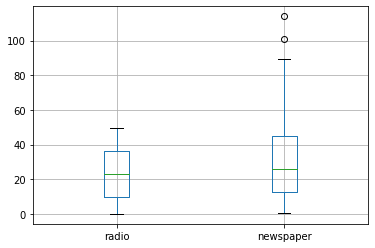

In [7]:
data_frame.boxplot()

<AxesSubplot:ylabel='Count'>

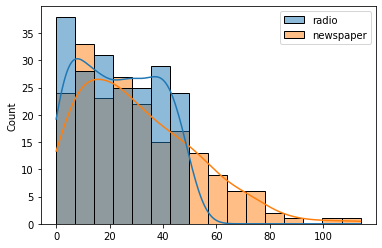

In [8]:
sns.histplot(data_frame, kde=True)

### *from initial analysis it seems that the newaspaper advertising is more profitable (mean, max min)*

<AxesSubplot:title={'center':'Difference between newspaper and radio'}, ylabel='Count'>

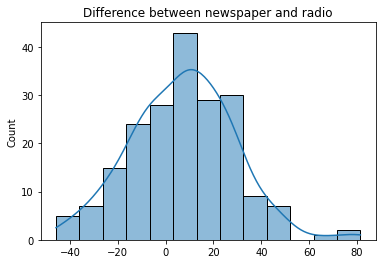

In [9]:
plt.title('Difference between newspaper and radio')
sns.histplot(data_frame.newspaper - data_frame.radio, kde=True)

### 

In [10]:
### *since the mean is positive, we can assume that the newspaper is more profitable*

## 10.1.1 Build confidence range for the mean diffenceses

### Calculate the mean and the standard deviation

In [11]:
vDiff = data_frame.newspaper - data_frame.radio
n = len(vDiff)
d_bar = np.mean(vDiff)
d_bar

7.29

### *since we assume it is normal distribution, we can estimate the standard deviation*

In [12]:
s_d = np.sqrt((np.sum((vDiff - d_bar) ** 2)) / (n - 1))
s_d

21.58105906930343

### Calculate the confidence Interval

In [13]:
from scipy import stats

alpha = 0.05
t = stats.t.ppf(1-alpha, n - 1)
wing = t * s_d / np.sqrt(n)

# Output
print(f't: {t}')
print(f'Confidence Interval: [{d_bar - wing}, +inf)]')
print(f'Confidence Level: {(1 - alpha)*100}%')

t: 1.652546746165939
Confidence Interval: [4.768194956358114, +inf)]
Confidence Level: 95.0%


## 10.1.2 Make the corresponding hypothesis

### *H0: There is no difference in profit from newaspaper and radio advertising*
### *H1: The advertising in the newaspaper is more profitable*

### Calculate p-value

In [14]:

mu_0 = 0
T = (d_bar - mu_0) / (s_d / np.sqrt(n))
P_value = 1 - stats.t.cdf(abs(T), n - 1)
print(f'statistic: {T}, pvalue: {P_value}')

statistic: 4.777159840299083, pvalue: 1.7226027744232653e-06


## 10.1.3 Null hypothesis rejection

### *we can reject the H0 hypothesis for every confidence level greater or equal to the 1.72e-06*

### a shortert way to perform the t test is to use the ttest_rel (related) function of stats
### to calculate the T test and the p value

In [15]:
stats.ttest_rel(data_frame.newspaper, data_frame.radio, alternative='greater')   

Ttest_relResult(statistic=4.777159840299082, pvalue=1.7226027744390396e-06)